In [1]:
### imporitng lib

In [3]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from causalnex.structure.notears import from_pandas
from causalnex.structure import StructureModel
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from sklearn.preprocessing import LabelEncoder
from causalnex.discretiser import Discretiser
from causalnex.network import BayesianNetwork
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score
from causalnex.inference import InferenceEngine

In [4]:
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [5]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))


In [ ]:
# data reading 

In [25]:
df_tripOrder = pd.read_csv("../data/newCleanData.csv")

In [9]:
df.shape

(1555718, 20)

In [26]:
colu = ['Unnamed: 0', 'Trip_Origin_lat','Trip_Origin_lng','Trip_Origin_lng', 'Trip_Destn_lat', 'Trip_Destn_lng', 'id', 'order_id','driver_id', 'lat', 'lng']

In [28]:
df_tripOrder.drop(colu, inplace = True, axis =1)

In [29]:
# the selected columns for causal graph
df_tripOrder.head()

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Distance,Speed,driver_action,is_weekend,is_holiday
0,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.98,217.00,accepted,0,0
1,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.98,217.00,rejected,0,0
2,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.98,217.00,rejected,0,0
3,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.98,217.00,rejected,0,0
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.98,217.00,rejected,0,0


## preparing the data for learning 

In [50]:
df_tripOrder = pd.read_csv("../data/newCleanData.csv")

In [51]:
colu = ['Unnamed: 0', 'Trip_Origin_lat','Trip_Origin_lng','Trip_Origin_lng', 'Trip_Destn_lat', 'Trip_Destn_lng', 'id', 'order_id','driver_id', 'lat', 'lng']

In [52]:
df_tripOrder.drop(colu, inplace = True, axis =1)

In [53]:
df_tripOrder.head()

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Distance,Speed,driver_action,is_weekend,is_holiday
0,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.98,217.00,accepted,0,0
1,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.98,217.00,rejected,0,0
2,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.98,217.00,rejected,0,0
3,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.98,217.00,rejected,0,0
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.98,217.00,rejected,0,0


In [71]:
df_tripOrder.to_csv('../data/forCusalGraph.csv', index =False)

In [76]:
# copy the data
struct_data = df_tripOrder.copy()

**The data is resource intensive and random subdata would be used to construct the causal graph.**

In [77]:
struct_data.shape

(1555718, 10)

In [78]:
# identifying cattgorical variable
non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)
print(non_numeric_columns)

['Trip Origin', 'Trip Destination', 'Trip Start Time', 'Trip End Time', 'driver_action']


In [79]:
# changing to numeric values 
le = LabelEncoder()
for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])
struct_data.head(5)

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Distance,Speed,driver_action,is_weekend,is_holiday
0,392001,11676,3785,275,123,20.98,217.00,0,0,0
1,392001,11676,3785,275,123,20.98,217.00,1,0,0
2,392001,11676,3785,275,123,20.98,217.00,1,0,0
3,392001,11676,3785,275,123,20.98,217.00,1,0,0
4,392001,11676,3785,275,123,20.98,217.00,1,0,0


In [93]:
# initializing the structural model
sm = StructureModel()
# selecting the dataset used to construct the causal graph


In [174]:
x_selected = struct_data.head(100000)

In [175]:
# renaming couluns  
dict = {'Trip Origin': 'Trip_Origin',
        'Trip ID': 'Order_id',
        'Trip Destination': 'Trip_Dest',
        'Trip Start Time': 'Trip_Start_Time',
        'Trip End Time': 'Trip_End_Time'}
 
# call rename () method
x_selected.rename(columns=dict,
          inplace=True)

In [176]:
sm = from_pandas(x_selected)

**and visualise the learned StructureModel using the plot function.**

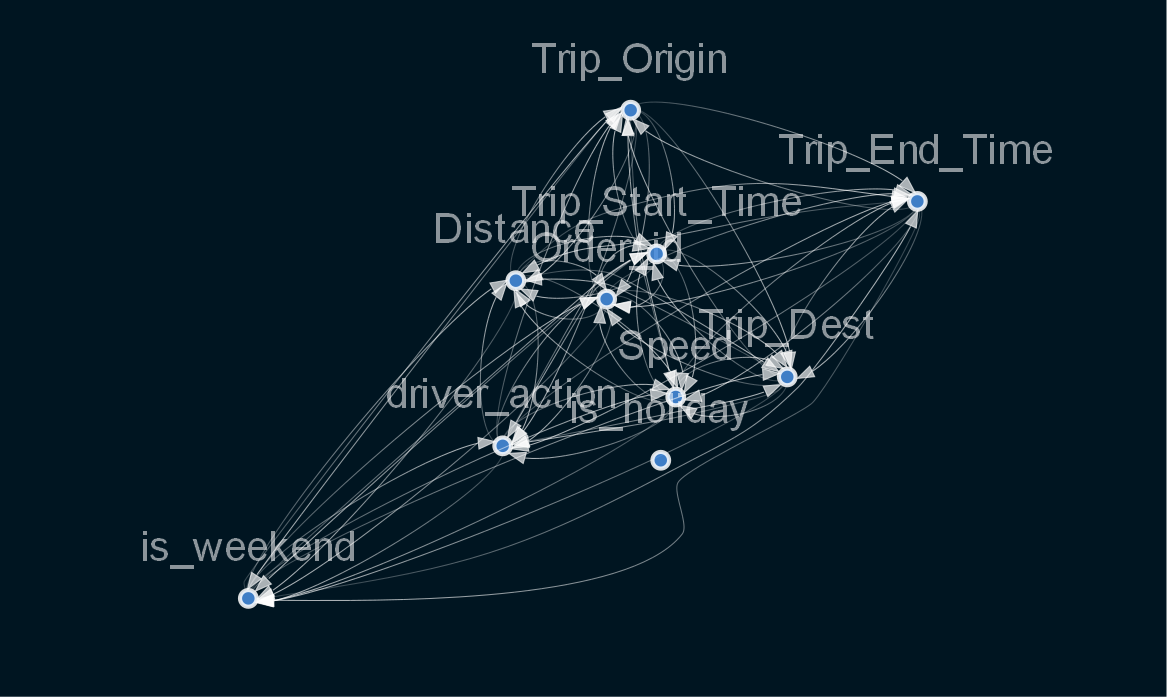

In [178]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    prog='fdp',
)
Image(viz.draw(format='png'))

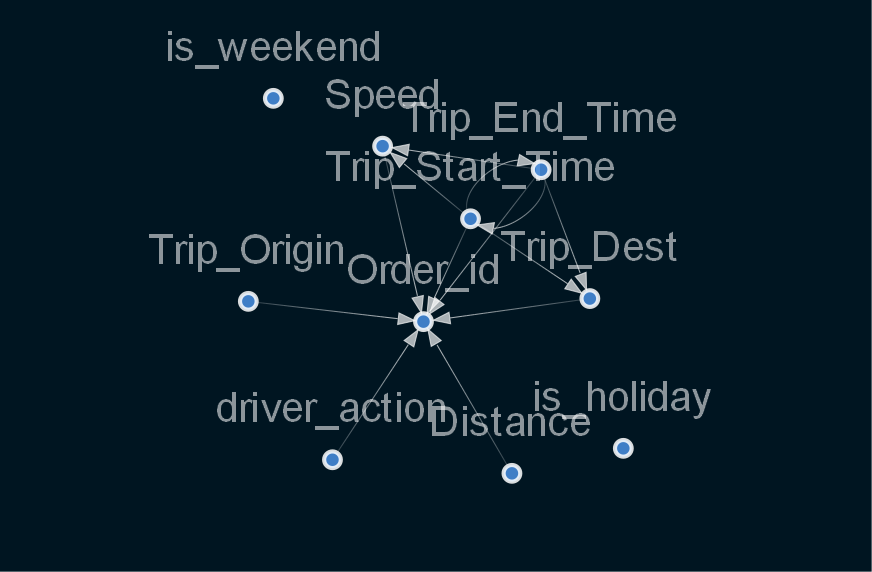

In [179]:
## removing edges with low threshold
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

in this structure, we can see that there are some relationships that appear intuitively correct:

- driver_action affects Order_id - orders may be accpeted or rejected by the drivers.

- distance affects  Order_id - the distance between the driver location and customer location may affect the fulfillment of orders. Sometimes if the distance is large, the order might rejected.

### Stablity of causal graph

In [180]:
def jaccard_similarity(g,h):
    i = set(g).intersection(h)
    return round(len(i)/(len(g) + len(h) - len(i)),3)

#### checking 60%

In [187]:
portion = int(x_selected.shape[0] *.60)
x_portion = x_selected.head(portion)
#sm_60 = from_pandas(x_portion, )
#jacard_similartiy(sm, sm_60)

In [ ]:
%%time
sm1 = from_pandas(x_portion)
sm1.remove_edges_below_threshold(0.8)
# sm1 = sm1.get_largest_subgraph()
# vs.vis_sm(sm1)

sm1 = sm1.get_largest_subgraph()
viz = plot_structure(
    sm1,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

In [110]:
print(sm1.edges)

[('Trip Origin', 'Trip ID'), ('Trip Destination', 'Trip ID'), ('Trip Start Time', 'Trip ID'), ('Trip Start Time', 'Trip Origin'), ('Trip Start Time', 'Trip Destination'), ('Trip Start Time', 'Trip End Time'), ('Trip Start Time', 'Speed'), ('Trip End Time', 'Trip ID'), ('Trip End Time', 'Trip Origin'), ('Trip End Time', 'Trip Destination'), ('Trip End Time', 'Trip Start Time'), ('Trip End Time', 'Speed'), ('Distance', 'Trip ID'), ('Speed', 'Trip ID'), ('driver_action', 'Trip ID')]


**80%**

In [113]:
portion = int(x_selected.shape[0] *.80)
x_portion = x_selected.head(portion)

CPU times: total: 4min 3s
Wall time: 1min 21s


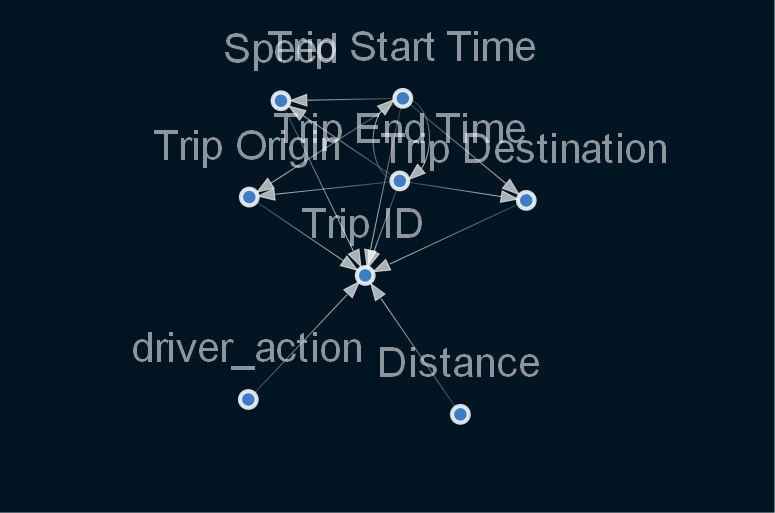

In [114]:
%%time
sm2 = from_pandas(x_portion)
sm2.remove_edges_below_threshold(0.8)
# sm1 = sm1.get_largest_subgraph()
# vs.vis_sm(sm1)

sm2 = sm1.get_largest_subgraph()
viz = plot_structure(
    sm2,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

In [115]:
print(sm2.edges)

[('Trip Origin', 'Trip ID'), ('Trip Destination', 'Trip ID'), ('Trip Start Time', 'Trip ID'), ('Trip Start Time', 'Trip Origin'), ('Trip Start Time', 'Trip Destination'), ('Trip Start Time', 'Trip End Time'), ('Trip Start Time', 'Speed'), ('Trip End Time', 'Trip ID'), ('Trip End Time', 'Trip Origin'), ('Trip End Time', 'Trip Destination'), ('Trip End Time', 'Trip Start Time'), ('Trip End Time', 'Speed'), ('Distance', 'Trip ID'), ('Speed', 'Trip ID'), ('driver_action', 'Trip ID')]


**90%**

In [116]:
portion = int(x_selected.shape[0] *.9)
x_portion = x_selected.head(portion)

CPU times: total: 3min 21s
Wall time: 1min 13s


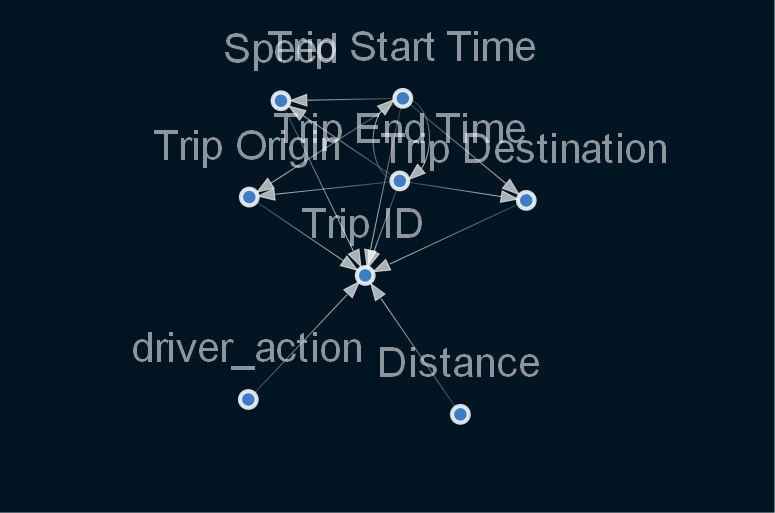

In [117]:
%%time
sm3 = from_pandas(x_portion)
sm3.remove_edges_below_threshold(0.8)
# sm1 = sm1.get_largest_subgraph()
# vs.vis_sm(sm1)

sm3 = sm1.get_largest_subgraph()
viz = plot_structure(
    sm3,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

In [119]:
print(sm3.edges)

[('Trip Origin', 'Trip ID'), ('Trip Destination', 'Trip ID'), ('Trip Start Time', 'Trip ID'), ('Trip Start Time', 'Trip Origin'), ('Trip Start Time', 'Trip Destination'), ('Trip Start Time', 'Trip End Time'), ('Trip Start Time', 'Speed'), ('Trip End Time', 'Trip ID'), ('Trip End Time', 'Trip Origin'), ('Trip End Time', 'Trip Destination'), ('Trip End Time', 'Trip Start Time'), ('Trip End Time', 'Speed'), ('Distance', 'Trip ID'), ('Speed', 'Trip ID'), ('driver_action', 'Trip ID')]


In [126]:
jaccard_similarity(sm2.edges, sm3.edges)

1.0

**100%**

In [128]:
ortion = int(x_selected.shape[0] *1)
x_portion = x_selected.head(portion)

CPU times: total: 3min 47s
Wall time: 1min


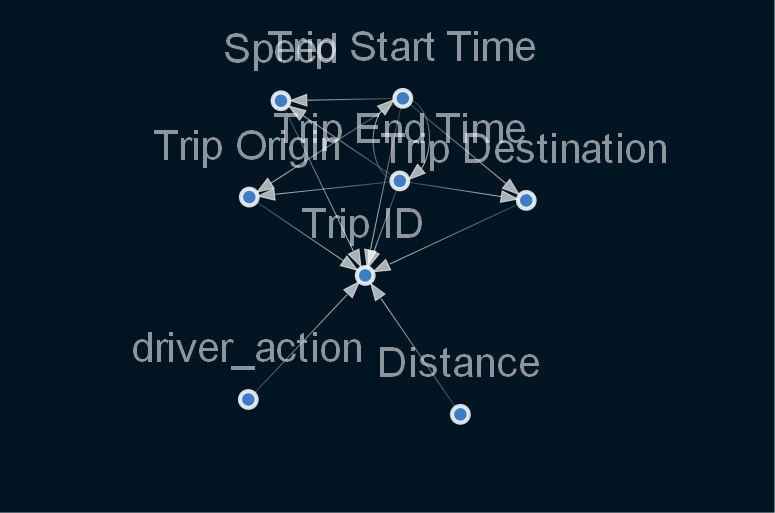

In [129]:
%%time
sm4 = from_pandas(x_portion)
sm4.remove_edges_below_threshold(0.8)
# sm1 = sm1.get_largest_subgraph()
# vs.vis_sm(sm1)

sm4 = sm1.get_largest_subgraph()
viz = plot_structure(
    sm4,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

In [122]:
print(sm4.edges)

[('Trip Origin', 'Trip ID'), ('Trip Destination', 'Trip ID'), ('Trip Start Time', 'Trip ID'), ('Trip Start Time', 'Trip Origin'), ('Trip Start Time', 'Trip Destination'), ('Trip Start Time', 'Trip End Time'), ('Trip Start Time', 'Speed'), ('Trip End Time', 'Trip ID'), ('Trip End Time', 'Trip Origin'), ('Trip End Time', 'Trip Destination'), ('Trip End Time', 'Trip Start Time'), ('Trip End Time', 'Speed'), ('Distance', 'Trip ID'), ('Speed', 'Trip ID'), ('driver_action', 'Trip ID')]


In [127]:
# similarity
jaccard_similarity(sm3.edges, sm4.edges)

1.0

In [133]:
# removing not acyclic stucture
sm4.remove_edge('Trip Start Time', 'Trip End Time')
sm4.remove_edge('Trip End Time','Trip Start Time')

## Fitting the Conditional Distribution of the Bayesian Network

In [134]:
bn = BayesianNetwork(sm4)

### Discretising Numeric Features

In [139]:
discretised_data.columns

Index(['Trip ID', 'Trip Origin', 'Trip Destination', 'Trip Start Time',
       'Trip End Time', 'Distance', 'Speed', 'driver_action', 'is_weekend',
       'is_holiday'],
      dtype='object')

In [154]:
discretised_data = x_selected.copy()

In [155]:
# discretised_data["driver_action"] = Discretiser(method="fixed",
#                           numeric_split_points=[1, 10]).transform(discretised_data["driver_action"].values)
discretised_data["Trip ID"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["Trip ID"].values)
discretised_data["Trip Origin"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["Trip Origin"].values)
discretised_data["Trip Destination"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["Trip Destination"].values)
discretised_data["Trip Start Time"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["Trip Start Time"].values)
discretised_data["Trip End Time"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["Trip End Time"].values)
discretised_data["Distance"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["Distance"].values)
discretised_data["Speed"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["Speed"].values)

In [156]:
discretised_data.head()

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Distance,Speed,driver_action,is_weekend,is_holiday
0,1,1,1,1,1,1,1,0,0,0
1,1,1,1,1,1,1,1,1,0,0
2,1,1,1,1,1,1,1,1,0,0
3,1,1,1,1,1,1,1,1,0,0
4,1,1,1,1,1,1,1,1,0,0


In [ ]:
# bn = BayesianNetwork(sm)
# blanket = get_markov_blanket(bn, 'Driver_action')
# edge_list = list(blanket.structure.edges)
# edge_list

### Train Test Split

In [157]:
train, test = train_test_split(discretised_data, train_size=0.9, test_size=0.1, random_state=27)

### Model Probability

In [158]:
bn = bn.fit_node_states(discretised_data)

### Fit Conditional Probability Distributions

In [159]:
bn = bn.fit_cpds(train, method="BayesianEstimator", bayes_prior="K2")

In [160]:
predict = bn.predict(test, 'driver_action')
true = test['driver_action']
predict

,driver_action_prediction
96485,1
71976,1
97758,1
24195,1
33547,1
...,...
85557,1
19398,1
57181,1
64355,1


In [165]:
## evaluation

In [164]:
print('Recall: {:.2f}'.format(recall_score(y_true=true, y_pred=predict)))
print('F1: {:.2f} '.format(f1_score(y_true=true, y_pred=predict)))
print('Accuracy: {:.2f} '.format(accuracy_score(y_true=true, y_pred=predict)))
print('Precision: {:.2f} '.format(precision_score(y_true=true, y_pred=predict)))

Recall: 1.00
F1: 0.99 
Accuracy: 0.98 
Precision: 0.98 


In [167]:
x_selected.head(1)

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Distance,Speed,driver_action,is_weekend,is_holiday
0,392001,11676,3785,275,123,20.98,217.00,0,0,0


## Inference

In [169]:
# creating inference engine

from causalnex.inference import InferenceEngine

Ine = InferenceEngine(bn)

ValueError: Variable names must match ^[0-9a-zA-Z_]+$ - please fix the following nodes: ['Trip Origin', 'Trip ID', 'Trip Destination', 'Trip Start Time', 'Trip End Time']

**Let's try to answer the following question**
- Given drivers are recommended to move 1km every 30 mins in a selected direction, what happens to the number of unfulfilled requests?
- If we assume we know the location of the next 20% of orders within 5km accuracy, what happens to the number of unfulfilled requests?
- Had we changed the time requirements to drivers operating time in the past, what fractions of orders could have been completed?
- If I increased the number of drivers by 10% cumulative per month, what fraction of orders can be completed?

Note: Speed is duration measured in seconds drived from the `Trip Start Time` and `Trip End Time`

In [ ]:
obser_1 = {"Distance": 1, "Speed": 180}
obser_2 = {"Trip ID": 2, "area_se": 2, "area_worst": 2}
marginals = ie.query([observation_1, observation_2])

In [ ]:
for m in marginals:
    print(m['driver_action'])